# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [2]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch

In [3]:
SAMPLE_RATE = 22050 # number of samples of the audio per second

In [4]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)
# making a dummy sound wave 

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [195]:
# Just some re-shaping and dimension finding

train = np.array(pd.read_csv("train.csv", header=None, nrows=100))
test = np.array(pd.read_csv("test.csv", header=None, nrows=100))

N = 100
print "N:",N
# train = signal[np.newaxis,:]
print "Train shape",train.shape
N_train = train.shape[0]
N_test = test.shape[0]
NUM_SAMPLES = train.shape[1]-1

test = test[:,1:-1]

X_train = train[:,1:-2]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

N: 100
Train shape (100, 88201)


In [71]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [157]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.pseudo_cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [181]:
def tempogram(y):
    Q = librosa.feature.tempogram(y=y, sr=SAMPLE_RATE)
#     Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q

In [187]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print test_spec.shape
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


In [188]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

In [182]:
tmp_train_temp = np.zeros((N_train,384,FRAMES))
for i in range(N_train):
    tmp_train_temp[i,:,:] = tempogram(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

In [196]:
tmp_test = np.zeros((N_test,FEATS,FRAMES))
for i in range(N_test):
    tmp_test[i,:,:] = mel_spec(test[i])

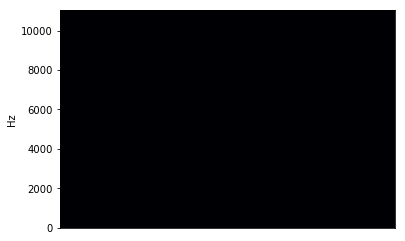

In [198]:
librosa.display.specshow(tmp_test[13], y_axis='hz')

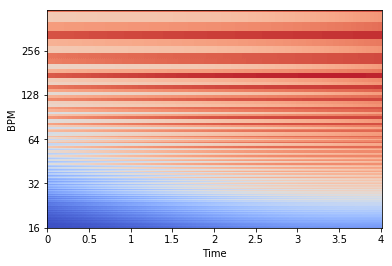

In [183]:
librosa.display.specshow(tmp_train_temp[1], x_axis='time', y_axis='tempo')

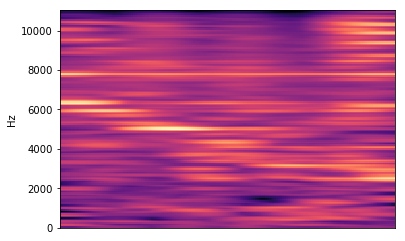

In [194]:
librosa.display.specshow(tmp_train[17], y_axis='hz')

In [153]:
print test[36]

[ 3.60000000e+01 -2.12668590e-02 -2.28455607e-02 ... -1.47281997e-02
 -2.24792603e-02 -2.59229559e-02]


In [179]:
print X_train[1], y_train[1]

[ 0.          0.00071228  0.00142399 ... -0.00213454 -0.00142399
 -0.00071228] [0.]


In [180]:
ipd.Audio(X_train[1], rate=SAMPLE_RATE)